In [1]:
%load_ext autoreload
%autoreload 2

Ground truth labels provided. Computing ground truth-based clustering metrics along with non-ground truth based metrics.
[k=3] Best run is 9 (out of 10) with Calinski-Harabasz score = 222.351
[k=4] Best run is 5 (out of 10) with Calinski-Harabasz score = 204.046
[k=5] Best run is 2 (out of 10) with Calinski-Harabasz score = 197.875
[k=6] Best run is 1 (out of 10) with Calinski-Harabasz score = 192.258
[k=7] Best run is 7 (out of 10) with Calinski-Harabasz score = 184.237
[k=8] Best run is 1 (out of 10) with Calinski-Harabasz score = 180.641
[k=9] Best run is 0 (out of 10) with Calinski-Harabasz score = 177.863
[k=10] Best run is 8 (out of 10) with Calinski-Harabasz score = 169.377
[k=11] Best run is 3 (out of 10) with Calinski-Harabasz score = 162.124
[k=12] Best run is 5 (out of 10) with Calinski-Harabasz score = 156.529
[k=13] Best run is 0 (out of 10) with Calinski-Harabasz score = 151.197
[k=14] Best run is 7 (out of 10) with Calinski-Harabasz score = 146.653
[k=15] Best run is 4 (

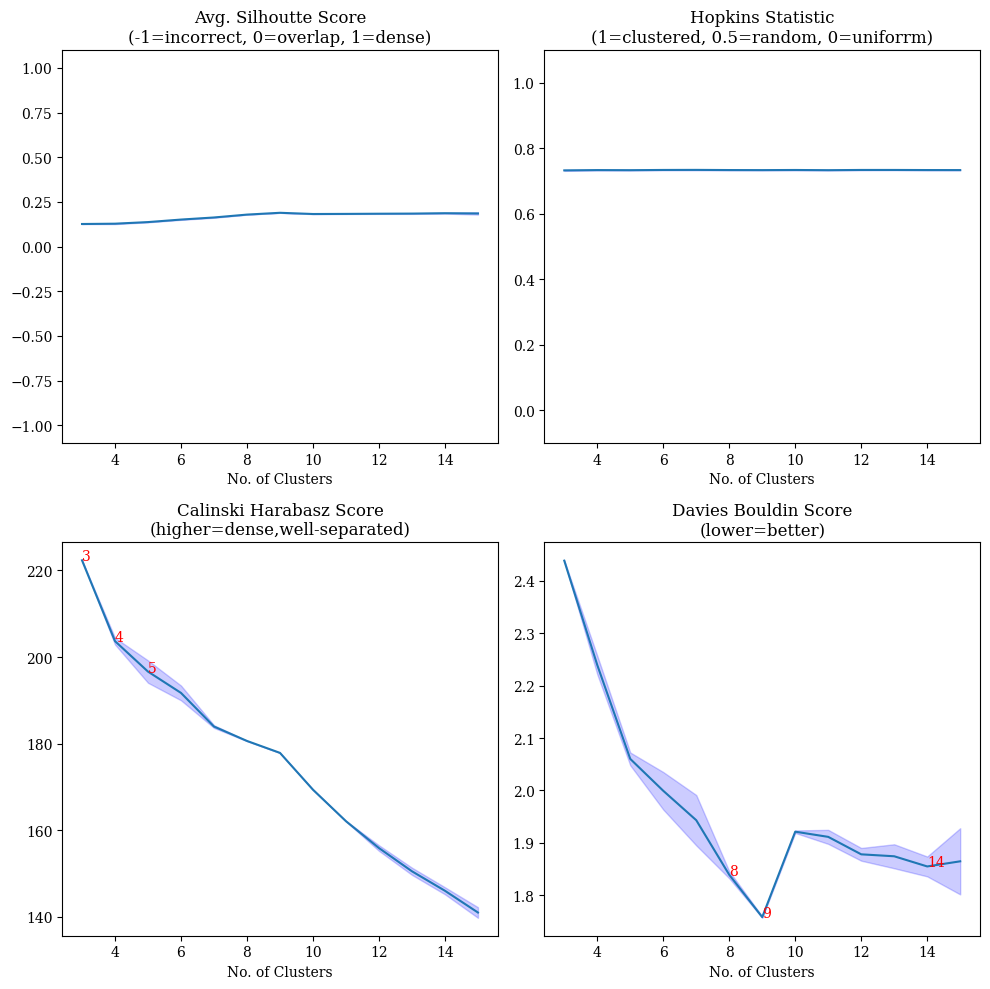

Saving ground truth-based clustering metrics plot at /home/rgura001/clustutils4r/src/clustutils4r/results/feats_clustering_metrics.png


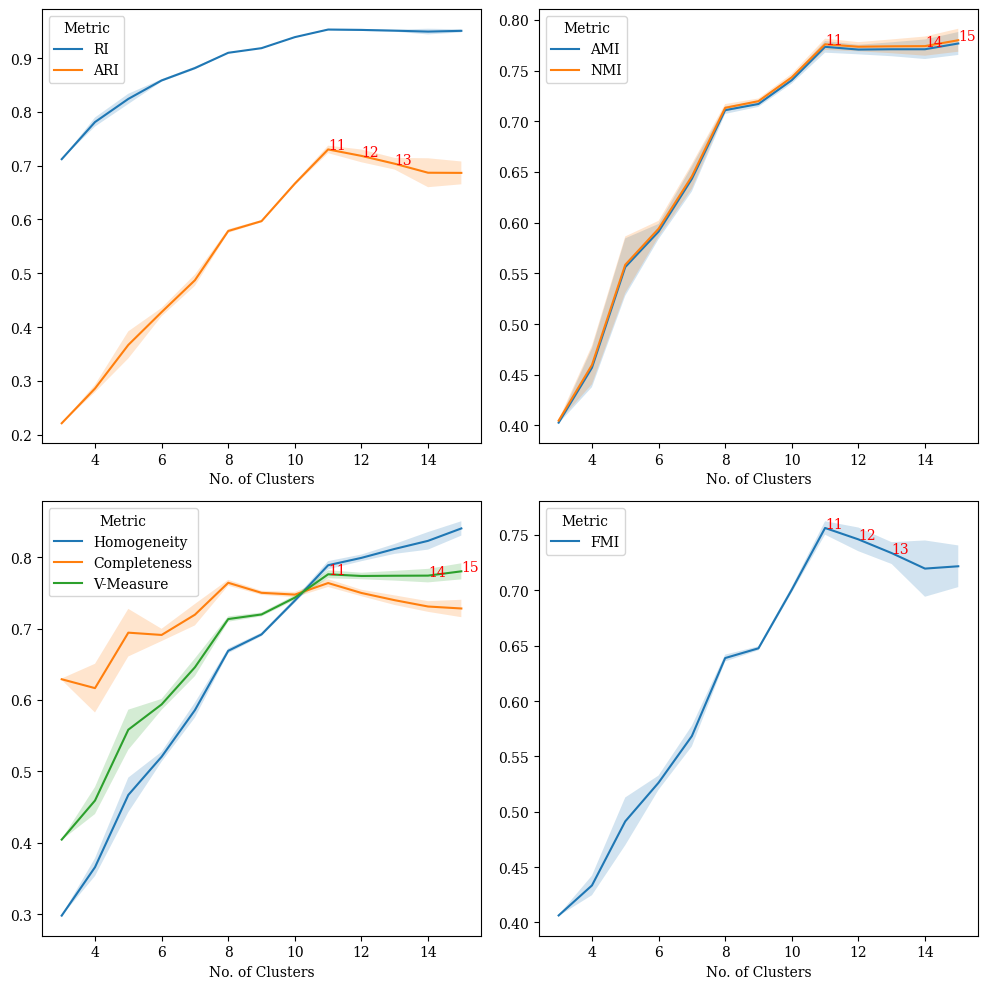

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import os, collections
from sklearn import datasets
from sklearn.cluster import KMeans

from eval_clustering import eval_clustering

# Load the iris dataset
data = datasets.load_digits()

# Split the data into features and labels
X = data.data
y = data.target

# Run the evaluation
range_clusters = list(range(3,15+1))
labelled_datapoints, \
   nongt_metrics, \
      gt_metrics = eval_clustering(X=X, gt_labels=y,
                                    model=KMeans(),
                                    num_clusters=range_clusters, num_runs=10,
                                    annotate_topN_best_scores=True, annotN=3,
                                    make_metrics_plots=True,
                                    make_silhoutte_plots=False,
                                    show=True, 
                                    save=True, RESULTS_DIR=os.getcwd()+'/results',
                                )

Ground truth labels provided. Computing ground truth-based clustering metrics along with non-ground truth based metrics.
[k=5] Best run is 2 (out of 10) with Calinski-Harabasz score = 197.875
Embedding data in 2-D...
Saving silhouette plot for k=5 at /home/rgura001/clustutils4r/src/clustutils4r/results/silhouette_plots/5_silhouette_plot.png


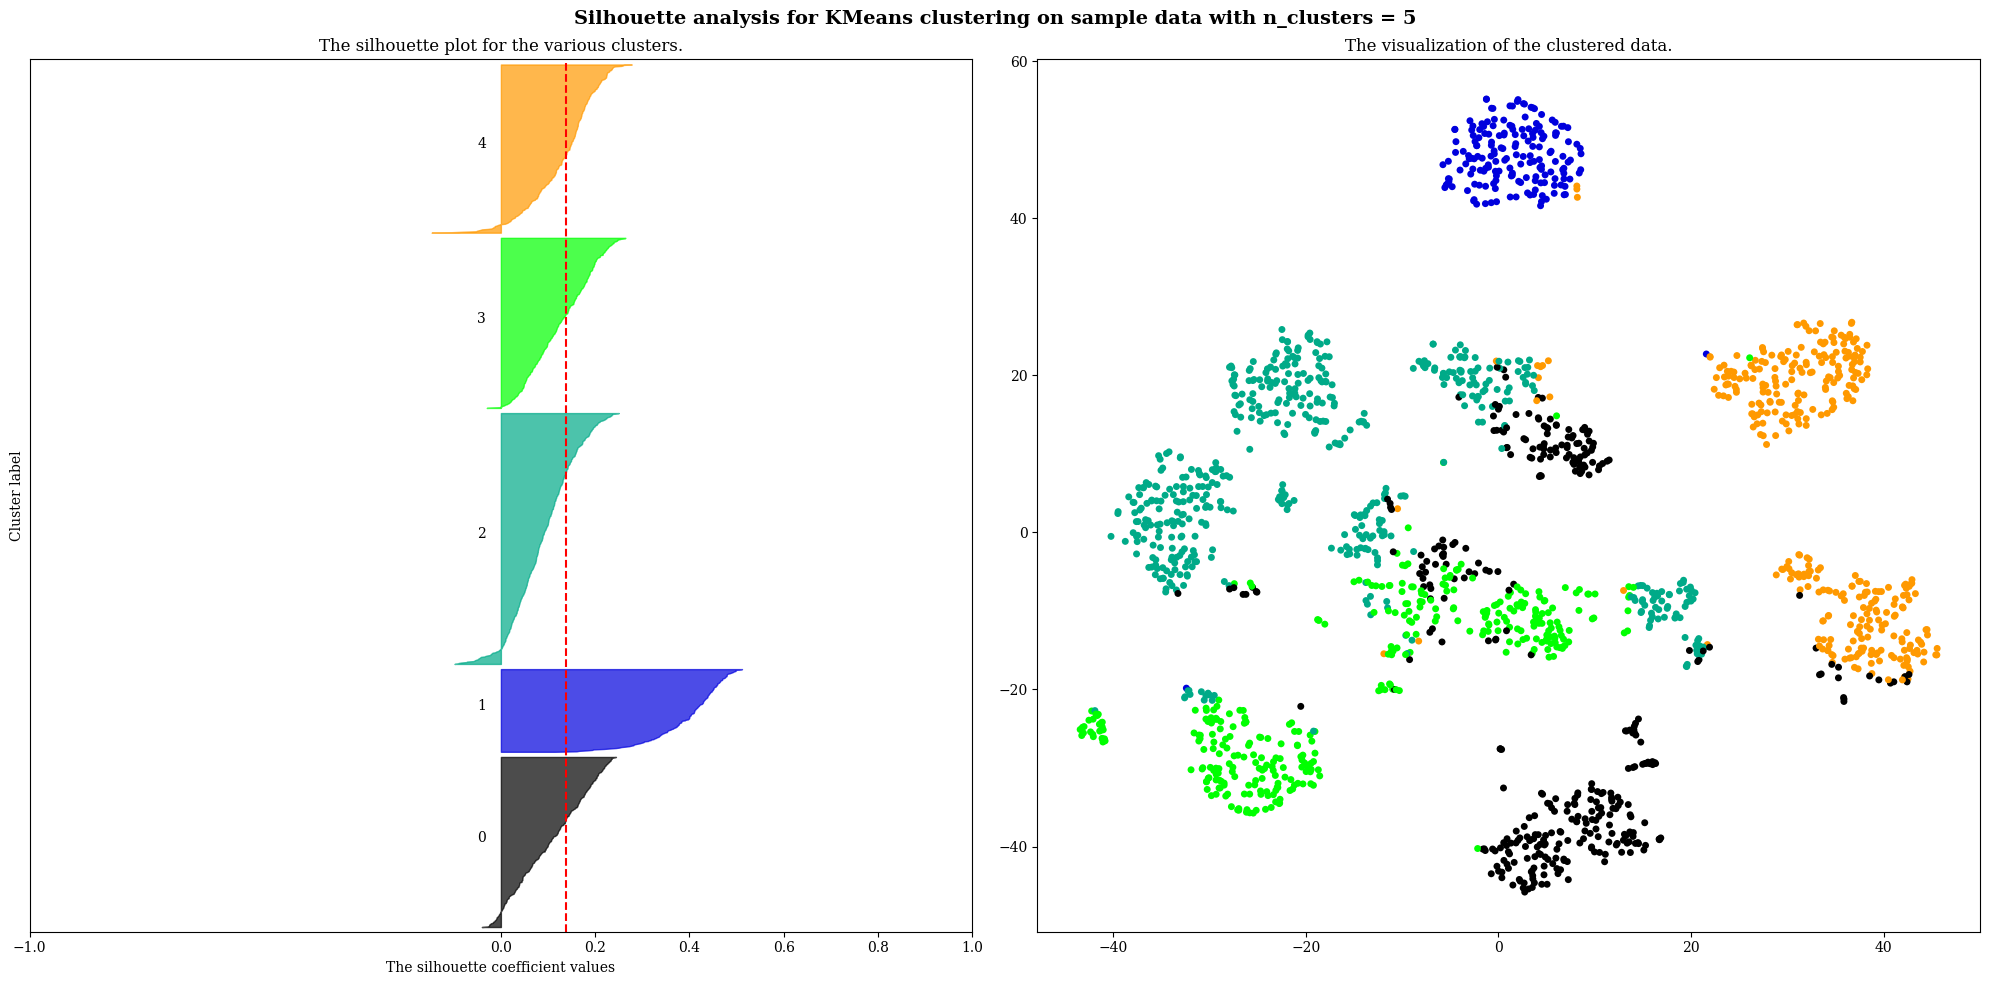

[k=10] Best run is 8 (out of 10) with Calinski-Harabasz score = 169.377
Embedding data in 2-D...
Saving silhouette plot for k=10 at /home/rgura001/clustutils4r/src/clustutils4r/results/silhouette_plots/10_silhouette_plot.png


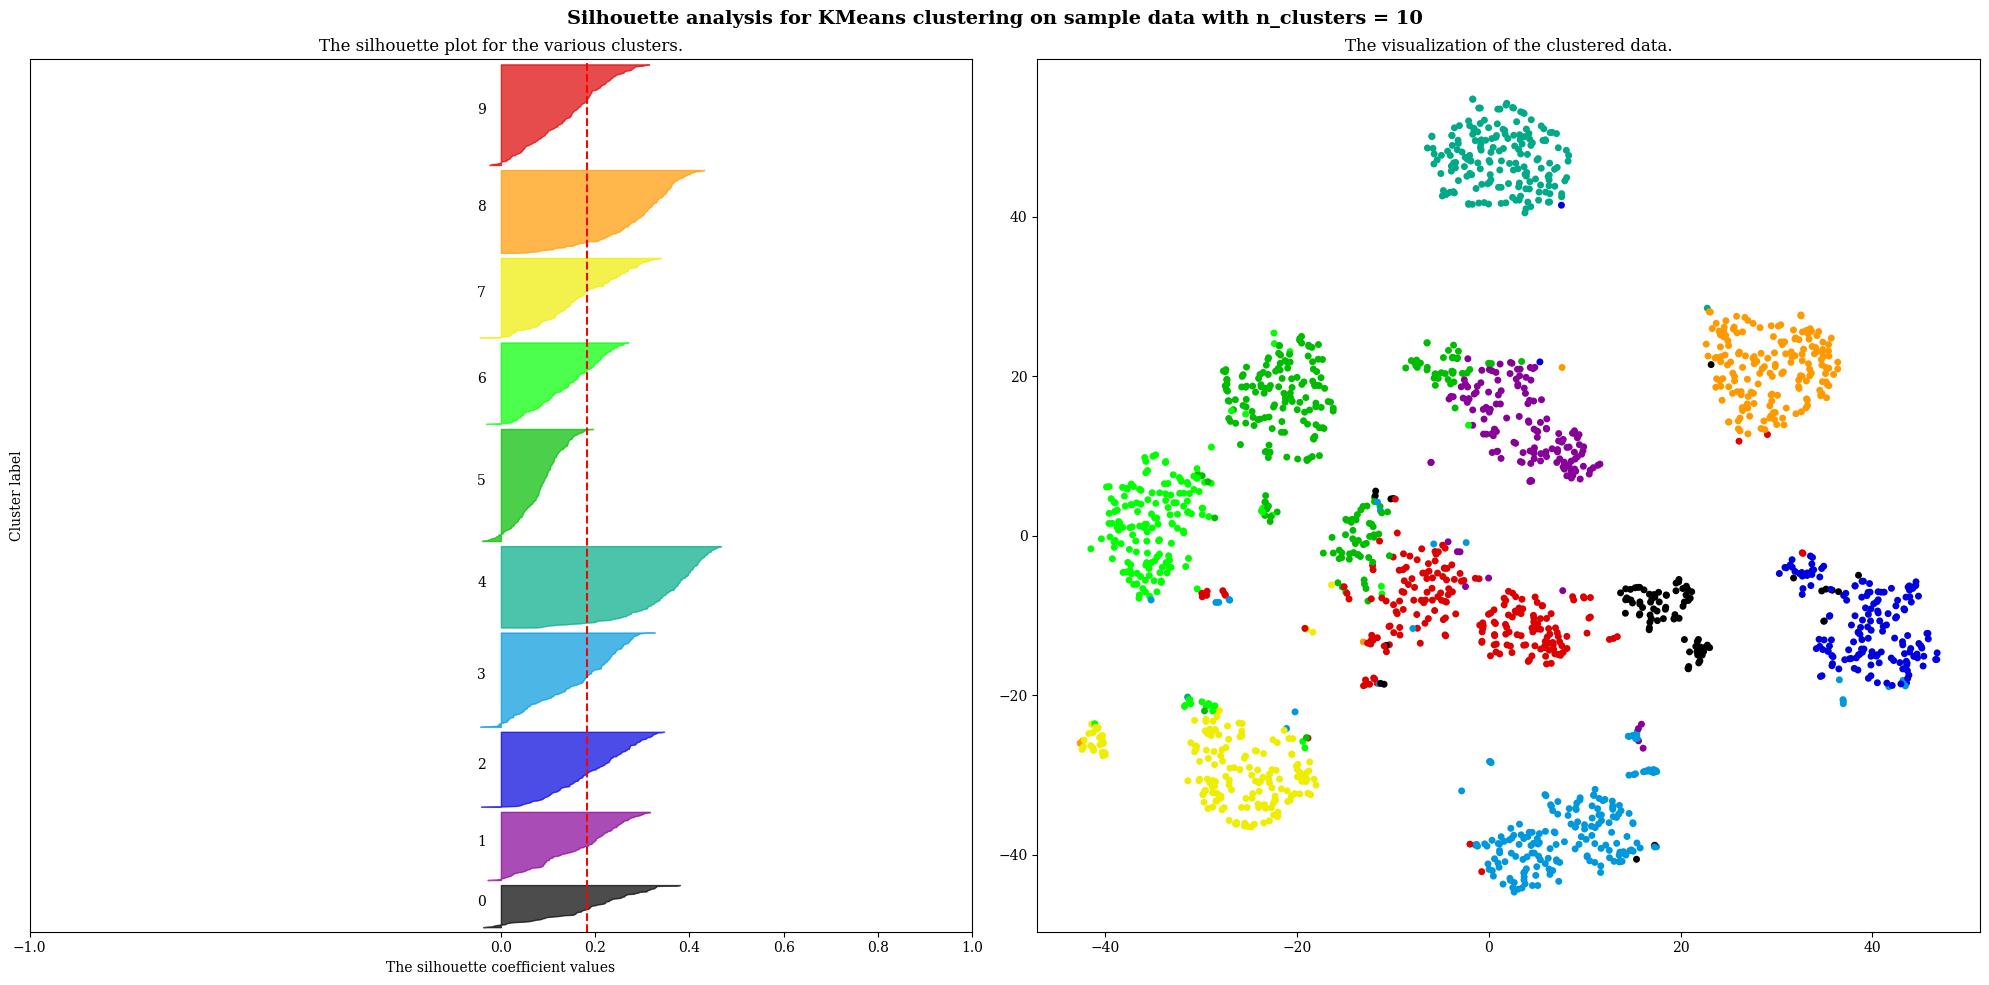

In [3]:
from eval_clustering import eval_clustering

range_clusters = [5, 10]
labelled_segs, \
   nongt_metrics, \
      gt_metrics = eval_clustering(X=X, gt_labels=y,
                                             model=KMeans(),
                                             num_clusters=range_clusters, 
                                             make_metrics_plots=False,
                                             make_silhoutte_plots=True, embed_data_in_2d=True,
                                             show=True, 
                                             save=True, RESULTS_DIR=os.getcwd()+'/results',
                                          )